# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import patsy

import statsmodels.api as sm
import statsmodels.formula.api as smf





In [2]:
tips = load_dataset('tips')
tips['tips_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### Criando matriz de design

In [3]:
y , X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill' , data = tips)

In [4]:
reg = sm.OLS(y , X).fit()

In [5]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.21e-18
Time:                        20:30:10   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Retirando variáveis não significantes

In [6]:
y , X = patsy.dmatrices('tip ~ net_bill' , data = tips)

In [7]:
reg = sm.OLS(y , X).fit()

In [8]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 20 May 2024   Prob (F-statistic):           5.02e-23
Time:                        20:30:10   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculando Resíduo da variável ```net_bill```

In [9]:
tips['res'] = reg.resid

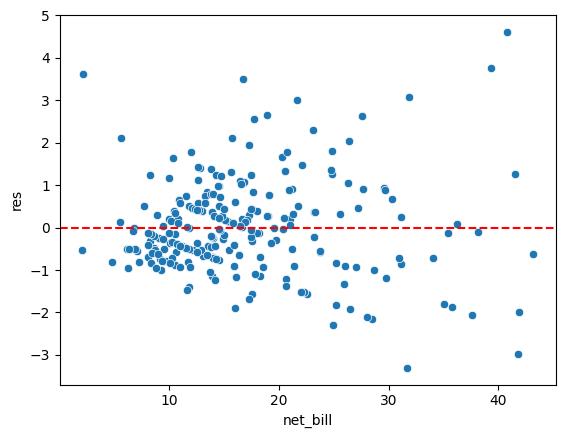

In [10]:
sns.scatterplot(x = 'net_bill' , y = 'res' , data = tips)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

### Calculando resíduo para ```log net_bill```

In [11]:
reg_log = smf.ols('tip ~ np.log(net_bill)' , data = tips).fit()

In [12]:
tips['res_log'] = reg.resid

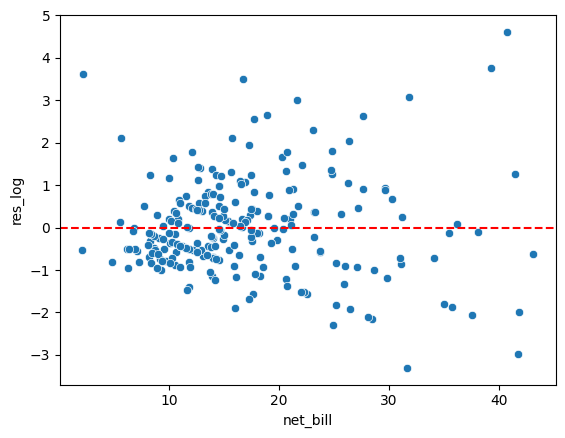

In [13]:
sns.scatterplot(x = 'net_bill' , y = 'res_log' , data = tips)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

### Calculando ```polinomio net_bill```

In [14]:
reg_poli = smf.ols('tip ~ np.power(net_bill , 2)' , tips).fit()

In [15]:
tips['res_poli'] = reg.resid

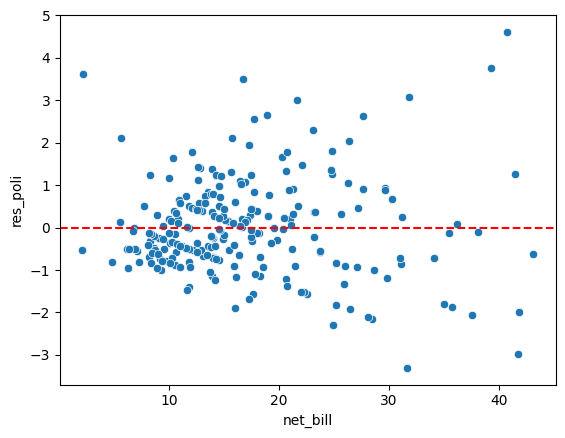

In [16]:
sns.scatterplot(x = 'net_bill' , y = 'res_poli' , data = tips)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

O modelo com log de net_bill ficou melhor ajustado.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [17]:
tips2 = load_dataset('tips')
tips2['tips_pct'] = tips2['tip'] / (tips2['total_bill'] - tips2['tip'])
tips2['net_bill'] = tips2['total_bill'] - tips2['tip']
tips2.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [18]:
y , X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill' , data = tips2)

In [19]:
reg2 = sm.OLS(y , X).fit()

In [20]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.21e-18
Time:                        20:30:10   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Retirando variáveis não significantes

In [21]:
y , X = patsy.dmatrices('np.log(tip) ~ net_bill' , data = tips2)
reg2 = sm.OLS(y ,X).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 20 May 2024   Prob (F-statistic):           2.60e-21
Time:                        20:30:10   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculando resíduo

In [22]:
tips2['res_log'] = reg2.resid

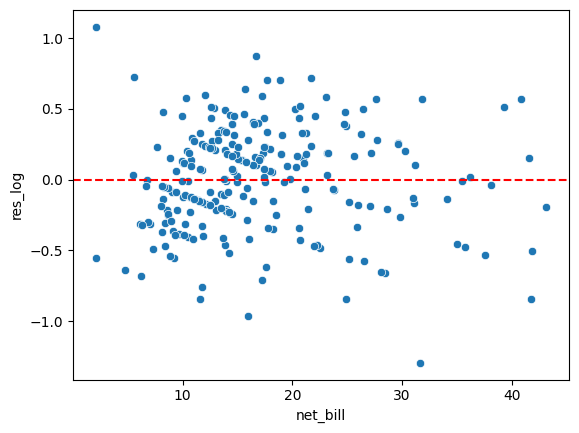

In [23]:
sns.scatterplot(x= 'net_bill' , y = 'res_log' , data = tips2)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

### Testando ```log net_bill``` e ```polinomio net_bill```

In [24]:
reg2_log = smf.ols('np.log(tip) ~ np.log(net_bill)' , data = tips2).fit()

In [25]:
reg2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 20 May 2024   Prob (F-statistic):           5.62e-22
Time:                        20:30:10   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
tips2['res_log2'] = reg2_log.resid

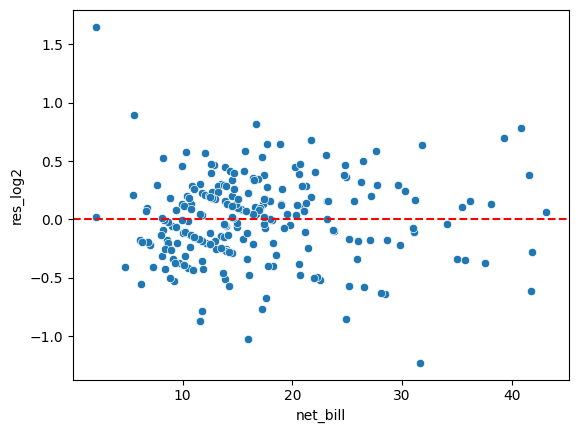

In [27]:
sns.scatterplot(x = 'net_bill' , y = 'res_log2' , data = tips2)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

In [28]:
reg2_poli = smf.ols('np.log(tip) ~ np.power(net_bill , 2)' , data = tips2).fit()

In [29]:
reg2_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Mon, 20 May 2024   Prob (F-statistic):           7.70e-17
Time:                        20:30:10   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7894      0.034     23.273      0.000       0.723       0.856
np.power(net_bill, 2)     0.0006   6.86e-05      8.982      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.507
Skew:                          -0.240   Prob(JB):                        0.285
Kurtosis:                       2.874   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
tips2['res_poli2'] = reg2_poli.resid

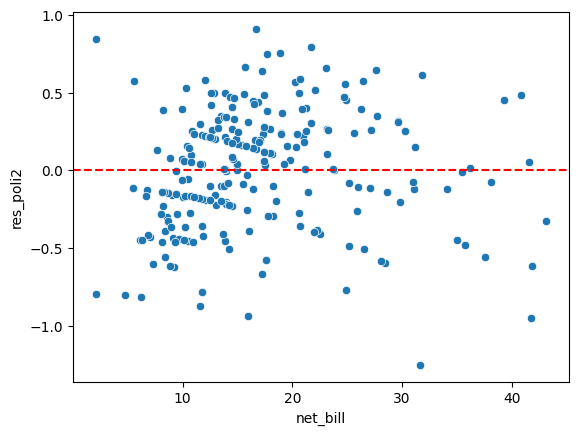

In [31]:
sns.scatterplot(x= 'net_bill' , y = 'res_poli2' , data = tips2)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

O ```log net_bill``` se adequou melhor aos dados.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [32]:
df = pd.read_csv(r'C:\Users\Gabriel\Documents\Data Science\Data Science EBAC\Módulo 12\Atividade 3\previsao_de_renda.csv')

In [33]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [35]:
df.isnull().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [36]:
#Transformando coluna data em objeto datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [37]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(0)

In [38]:
reg = smf.ols('renda ~ tempo_emprego' , data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2660.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:30:10   Log-Likelihood:            -1.5536e+05
No. Observations:               15000   AIC:                         3.107e+05
Df Residuals:                   14998   BIC:                         3.107e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2663.4431     85.613     31.110      0.000    2495.631    2831.255
tempo_emprego   474.1904      9.193     51.579      0.000     456.170     492.211
==============================================================================
Omnibus:                    21229.653   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11935568.768
Skew:                           8.154   Prob(JB):                         0.00
Kurtosis:                     140.226   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df['res'] = reg.resid

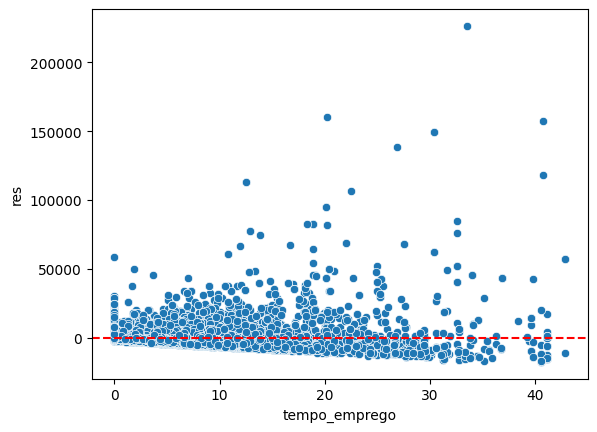

In [40]:
sns.scatterplot(x = 'tempo_emprego' , y = 'res' , data = df)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

### Melhorando a regressão

In [41]:
reg = smf.ols('np.log(renda) ~ tempo_emprego' , data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3001.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:30:10   Log-Likelihood:                -18056.
No. Observations:               15000   AIC:                         3.612e+04
Df Residuals:                   14998   BIC:                         3.613e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8672      0.009    868.148      0.000       7.849       7.885
tempo_emprego     0.0533      0.001     54.785      0.000       0.051       0.055
==============================================================================
Omnibus:                       35.161   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.344
Skew:                           0.119   Prob(JB):                     2.11e-08
Kurtosis:                       3.019   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
df['res_log'] = reg.resid

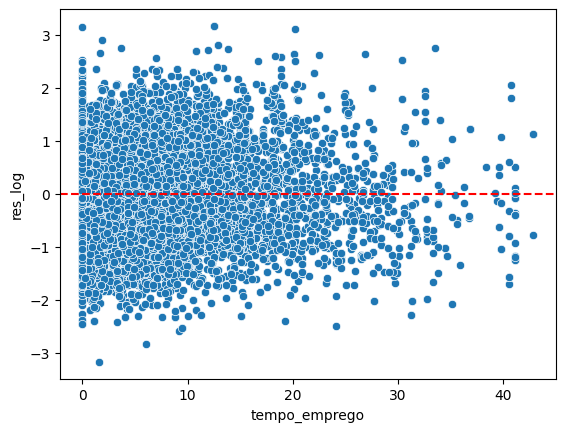

In [43]:
sns.scatterplot(x = 'tempo_emprego' , y = 'res_log' , data = df)
plt.axhline(y = 0 , color = 'r' , linestyle = '--')

plt.show()

### Regressão múltipla

In [70]:
df2 = df.drop(columns = ['res' , 'res_log'] , axis = 1)

In [71]:
y , X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + educacao + estado_civil + idade + tempo_emprego \
+  tipo_residencia + qt_pessoas_residencia + qtd_filhos + posse_de_imovel' , data = df2)

In [72]:
reg_mul = sm.OLS(y , X).fit()

In [73]:
reg_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     384.3
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:53:28   Log-Likelihood:                -16318.
No. Observations:               15000   AIC:                         3.268e+04
Df Residuals:                   14979   BIC:                         3.284e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.6812      0.225     29.679      0.000       6.240       7.122
sexo[T.M]                            0.7775      0.014     56.306      0.000       0.750       0.805
posse_de_veiculo[T.True]             0.0329      0.013      2.505      0.012       0.007       0.059
educacao[T.Pós graduação]            0.0377      0.152      0.248      0.804      -0.260       0.335
educacao[T.Secundário]              -0.0842      0.057     -1.487      0.137      -0.195       0.027
educacao[T.Superior completo]        0.0458      0.057      0.803      0.422      -0.066       0.158
educacao[T.Superior incompleto]     -0.0983      0.064     -1.539      0.124      -0.223       0.027
estado_civil[T.Separado]             0.2475      0.108      2.292      0.022       0.036       0.459
estado_civil[T.Solteiro]             0.2205      0.106      2.082      0.037       0.013       0.428
estado_civil[T.União]               -0.0274      0.023     -1.183      0.237      -0.073       0.018
estado_civil[T.Viúvo]                0.2806      0.109      2.575      0.010       0.067       0.494
tipo_residencia[T.Casa]             -0.0294      0.052     -0.563      0.574      -0.132       0.073
tipo_residencia[T.Com os pais]      -0.0195      0.059     -0.333      0.739      -0.135       0.096
tipo_residencia[T.Comunitário]      -0.1684      0.104     -1.619      0.105      -0.372       0.035
tipo_residencia[T.Estúdio]           0.0845      0.095      0.894      0.371      -0.101       0.270
tipo_residencia[T.Governamental]    -0.0017      0.062     -0.027      0.979      -0.124       0.120
posse_de_imovel[T.True]              0.0914      0.013      7.068      0.000       0.066       0.117
idade                                0.0095      0.001     15.547      0.000       0.008       0.011
tempo_emprego                        0.0559      0.001     63.876      0.000       0.054       0.058
qt_pessoas_residencia                0.2417      0.105      2.302      0.021       0.036       0.447
qtd_filhos                          -0.2211      0.105     -2.102      0.036      -0.427      -0.015
==============================================================================
Omnibus:                        0.669   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.643
Skew:                           0.012   Prob(JB):                        0.725
Kurtosis:                       3.020   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong

### Retirando variáveis não significantes

As variáveis que foram menos significantes observando o P>|t| foram ```educacao``` e ```tipo de residencia``` 

In [74]:
df2 = pd.get_dummies(df2, columns=['estado_civil'], drop_first=True)
df2 = df2.drop(columns=['estado_civil_União'])

In [83]:
variaveis = 'np.log(renda) ~ sexo + posse_de_veiculo + idade + tempo_emprego \
+ qt_pessoas_residencia + qtd_filhos + posse_de_imovel + estado_civil_Separado + estado_civil_Solteiro + estado_civil_Viúvo'

In [84]:
y , X = patsy.dmatrices(variaveis , data = df2)

In [85]:
reg_mul = sm.OLS(y , X).fit()
reg_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     751.5
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:57:54   Log-Likelihood:                -16377.
No. Observations:               15000   AIC:                         3.278e+04
Df Residuals:                   14989   BIC:                         3.286e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.6522      0.213     31.267      0.000       6.235       7.069
sexo[T.M]                         0.7709      0.014     55.906      0.000       0.744       0.798
posse_de_veiculo[T.True]          0.0444      0.013      3.393      0.001       0.019       0.070
posse_de_imovel[T.True]           0.0928      0.013      7.281      0.000       0.068       0.118
estado_civil_Separado[T.True]     0.2468      0.108      2.279      0.023       0.035       0.459
estado_civil_Solteiro[T.True]     0.2197      0.106      2.068      0.039       0.012       0.428
estado_civil_Viúvo[T.True]        0.2649      0.109      2.424      0.015       0.051       0.479
idade                             0.0090      0.001     15.099      0.000       0.008       0.010
tempo_emprego                     0.0561      0.001     64.011      0.000       0.054       0.058
qt_pessoas_residencia             0.2313      0.105      2.196      0.028       0.025       0.438
qtd_filhos                       -0.2094      0.106     -1.984      0.047      -0.416      -0.003
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.241
Skew:                           0.016   Prob(JB):                        0.538
Kurtosis:                       3.031   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
df2['res'] = reg_mul.resid

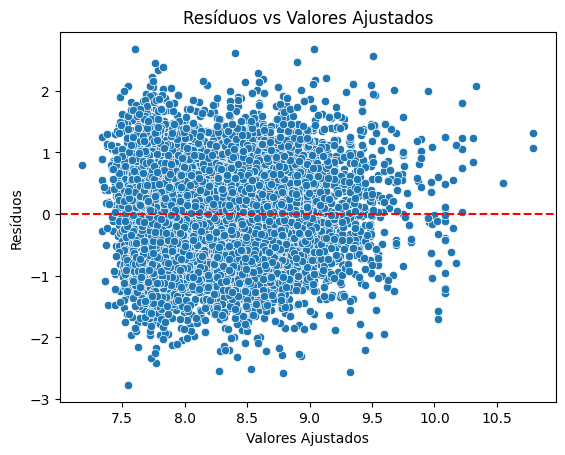

In [94]:
sns.scatterplot(x = reg_mul.fittedvalues , y = reg_mul.resid)

plt.axhline(y = 0 , linestyle = '--' , color = 'r')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')

plt.show()